# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [1]:
from __future__ import print_function
__author__= 'Pablo Mandiola'

import os
from subprocess import Popen, PIPE
import requests
from zipfile import ZipFile
try:
    import urllib2 as urlib
except ImportError:
    import urllib as urlib

import pylab as pl
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='DejaVu Sans', font_scale=1.2, rc=None)
%pylab inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

#Data handling
import numpy as np
import pandas as pd

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "{}/data/PUIdata".format(os.getenv("HOME"))
    puidata = os.getenv("PUIDATA")
    print("Warning: PUIDATA environmental variable not found and set by code, please review!")
print("PUIDATA: {}".format(puidata))

PUIDATA: /nfshome/pmb434/PUIdata


In [3]:
#Set the folder for APIKEY.py file
%cd "/nfshome/pmb434"

#Load API Keys
from APIKEY import GoogleKey

#Go back to previuos folder
%cd -

/nfshome/pmb434
/nfshome/pmb434/PUI2018/HW9_pmb434


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [4]:
#Helper function to download files
def download_file(url, filename, destiny=puidata, encoding='utf-8'):
    
    #Check if file exists, download if not
    if not os.path.isfile(destiny + '/' + filename):
        print ("Downloading file.")
        #Download with redirect
        urlib.request.urlretrieve(url, filename)
        os.system("mv " + filename + " " + destiny)
    else:
        print("File already downloaded.")
    
    #Placeholder for files from container
    files = None
    
    #Get extension   
    file_ext = filename.split('.')[-1]
    if file_ext == 'rar':
        
        #Get files from container
        files = Popen("unrar lb " + destiny + "/" + filename, shell=True, stdout=PIPE).stdout.read()
        files = files.decode(encoding).split(sep='\n')[:-1]
        files = [destiny + "/" + f.strip() for f in files]
        
        #Extract if needed
        missing = [f for f in files if not (os.path.isfile(f) or os.path.isdir(f))]
        if missing:
            print ("Extracting .{} container.".format(file_ext))
            os.system("unrar x " + destiny + "/" + filename + " " + destiny)
        else:
            print("File already extracted.")
            
    elif file_ext == 'zip' or file_ext == 'gz':
        
        #Get files from container
        files = Popen("unzip -Z1 " + destiny + "/" + filename, shell=True, stdout=PIPE).stdout.read()
        files = files.decode(encoding).split(sep='\n')[:-1]
        files = [destiny + "/" + f.strip() for f in files]
        
        #Extract if needed
        missing = [f for f in files if not os.path.isfile(f)]
        if missing:
            print ("Extracting .{} container.".format(file_ext))
            
            ZipFile(destiny + "/" + filename).extractall(destiny)
            #os.system("unzip " + destiny + "/" + filename + " -d " + destiny)
        else:
            print("File already extracted.")
            
    else:
        print("Won't extract {} file".format(file_ext))
    
    #Check again and return file path(s)
    if files is None:
        # Check:
        if not os.path.isfile(destiny + "/" + filename):
            print ("WARNING! Something is wrong: the file is not there.")
        else:
            print ("Files in place, you can continue.")
        
        return(destiny + "/" + filename)
    else:
        #Check:
        missing = [f for f in files if not (os.path.isfile(f) or os.path.isdir(f))]
        if missing:
            print ("WARNING! Something is wrong: some files are not there.")
            print (missing)
        else:
            print ("Files in place, you can continue.")
            
        return (files)

In [5]:
#World firearms from Google Drive, using Google API
fileId = '1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs'
url = 'https://www.googleapis.com/drive/v3/files/{}/export?mimeType=text/csv&key={}'.format(fileId, GoogleKey)
filename = 'world_firearms.csv'

world_firearms = pd.read_csv(download_file(url, filename))
world_firearms.head()

File already downloaded.
Won't extract csv file
Files in place, you can continue.


,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [6]:
world_firearms = world_firearms.loc[:,['Country/Territory', 'Number of homicides by firearm', 'Average total all civilian firearms']].rename(
    columns={'Country/Territory':'Country'})

In [7]:
world_firearms.dtypes

Country                                 object
Number of homicides by firearm         float64
Average total all civilian firearms    float64
dtype: object

In [8]:
#Mass shootings
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
filename = 'mass_shootings.csv'

mass_shootings = pd.read_csv(download_file(url, filename))
mass_shootings.head()

Won't extract csv file
Files in place, you can continue.


,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [9]:
mass_shootings.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings'}, inplace=True)

In [10]:
mass_shootings.dtypes

Country                      object
Guns per 100 inhabitants    float64
Number of mass shootings      int64
dtype: object

In [11]:
#World population
url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
filename = 'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip'

world_population = pd.read_csv(download_file(url, filename)[1], skiprows=4)
world_population.head()

Extracting .zip container.
Files in place, you can continue.


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [12]:
world_population = world_population.loc[:,['Country Name','2012']].rename(columns={'2012':'pop'})

In [13]:
world_population.dtypes

Country Name     object
pop             float64
dtype: object

In [14]:
#World GDP
url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
filename = 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.zip'

world_gdp = pd.read_csv(download_file(url, filename)[1], skiprows=4)
world_gdp.head()

Extracting .zip container.
Files in place, you can continue.


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [15]:
world_gdp = world_gdp.loc[:,['Country Name','2012']].rename(columns={'2012':'gdp'})

In [16]:
world_gdp.dtypes

Country Name     object
gdp             float64
dtype: object

In [17]:
df_ = world_firearms.merge(
    mass_shootings, on='Country').merge(
    world_population, right_on='Country Name', left_on='Country').merge(
    world_gdp, on='Country Name').drop(labels='Country Name', axis=1)
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


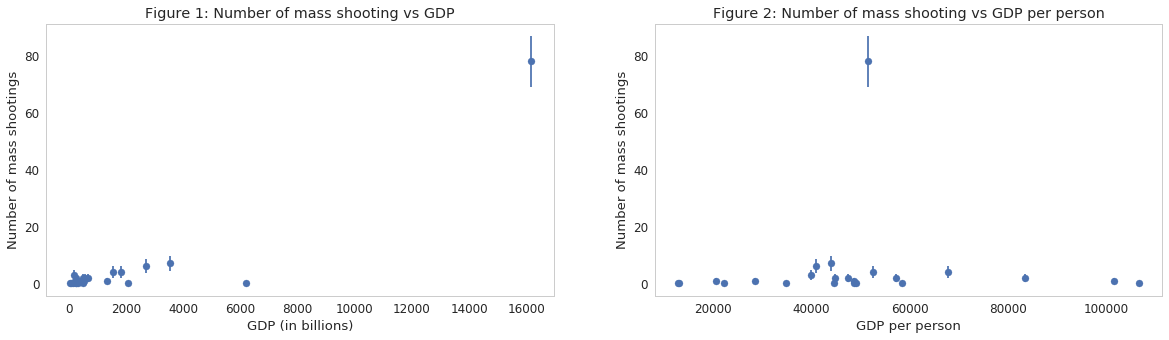

Number of mass shooting vs GDP in absolute numbers and per person, errors represent Poisson statistics.
The datapoint to the top right of Figure 1 is the USA,which has both the highest GDP and the highest number of mass shootings.
When using GDP per person in Figure 1, it is more clear that the USA is an outlier.


In [18]:
fig = pl.figure(figsize=(20,5)) 
(ax1, ax2) = fig.subplots(1,2)

#First
ax1.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax1.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'],
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', capsize=2)
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 1: Number of mass shooting vs GDP")
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shootings")

#Second
ax2.scatter(df_.gdp / df_['pop'], df_['Number of mass shootings'])
ax2.errorbar(df_.gdp / df_['pop'], df_['Number of mass shootings'],
            yerr = np.sqrt(df_['Number of mass shootings']), fmt = '.', capsize=2)
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 2: Number of mass shooting vs GDP per person")
ax2.set_xlabel("GDP per person")
ax2.set_ylabel("Number of mass shootings")

pl.show()
print ("Number of mass shooting vs GDP in absolute numbers and per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of Figure 1 is the USA," + 
       "which has both the highest GDP and the highest number of mass shootings.\n"+
       "When using GDP per person in Figure 1, it is more clear that the USA is an outlier.")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

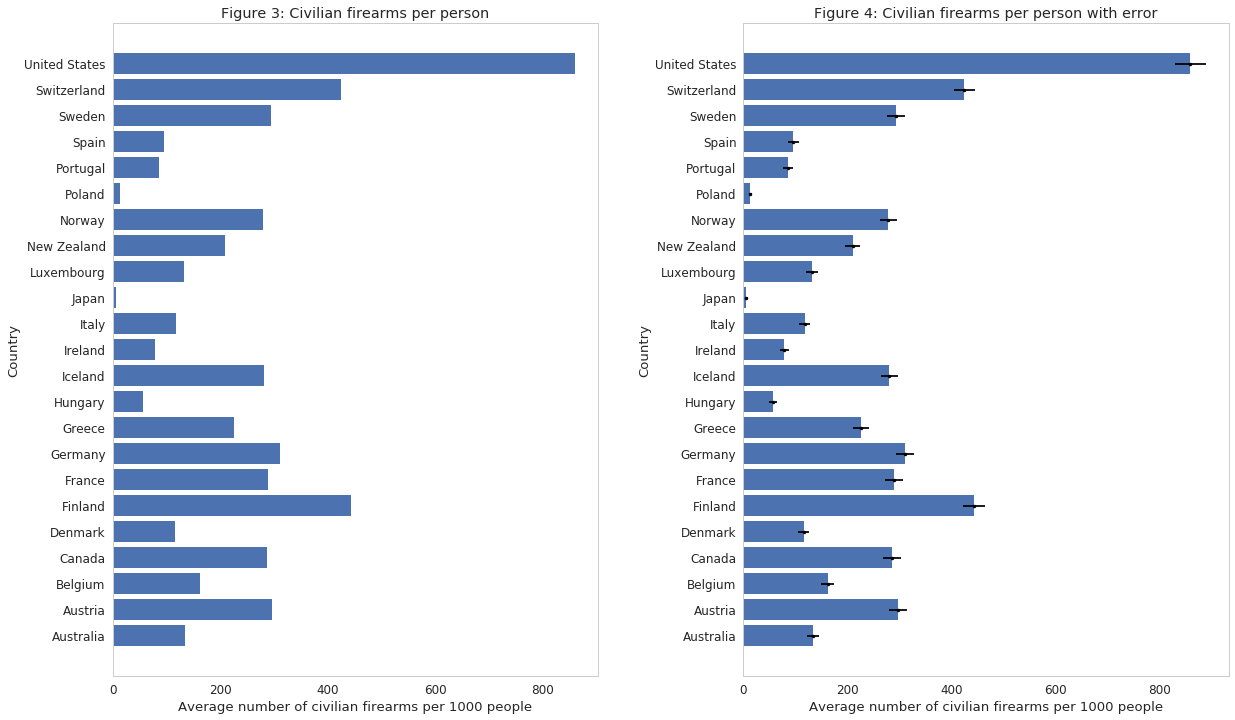

Civilian firearms per person without and with errors, errors represent Poisson statistics.
In Figure 3 the USA looks like an outlier, which is confirmed by Figure 4
when adding the statistical error.


In [19]:
fig = pl.figure(figsize=(20,12)) 
(ax1, ax2) = fig.subplots(1,2)

#First
ax1.barh(df_['Country'],df_['Average total all civilian firearms']/df_['pop']  * 1e3)
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 3: Civilian firearms per person")
ax1.set_xlabel("Average number of civilian firearms per 1000 people")
ax1.set_ylabel("Country")

#Second
ax2.barh(df_['Country'],df_['Average total all civilian firearms']/df_['pop']  * 1e3)
ax2.errorbar(df_['Average total all civilian firearms']/df_['pop']  * 1e3, df_['Country'],
            xerr = np.sqrt(df_['Average total all civilian firearms']/df_['pop']  * 1e3), fmt = '.', capsize=2, color='k')
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 4: Civilian firearms per person with error")
ax2.set_xlabel("Average number of civilian firearms per 1000 people")
ax2.set_ylabel("Country")

pl.subplots_adjust(wspace=0.3)

pl.show()
print ("Civilian firearms per person without and with errors, " + 
       "errors represent Poisson statistics.\n" + 
       "In Figure 3 the USA looks like an outlier, which is confirmed by Figure 4\n" + 
       "when adding the statistical error.")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

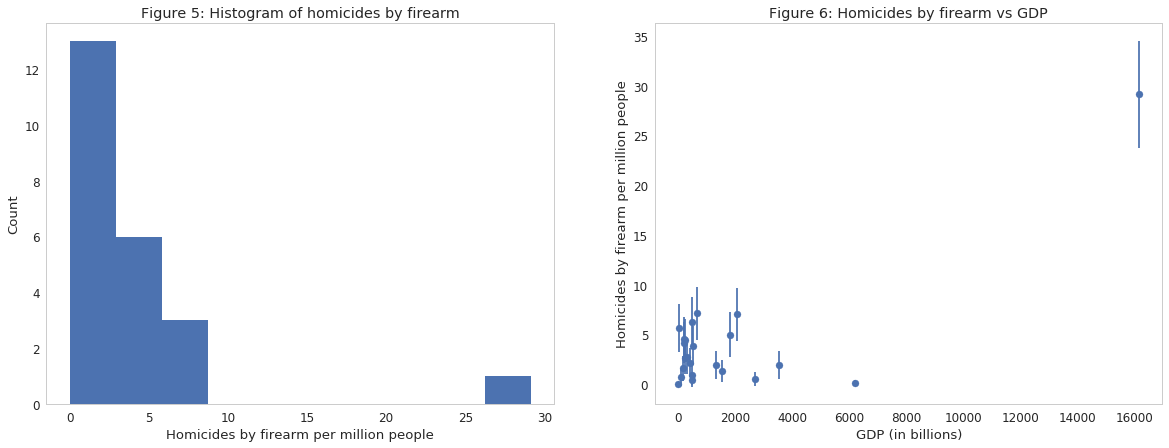

Homicides by firearm per person, errors represent Poisson statistics.
In the histogram in Figure 5 the USA looks like an outlier.When plotting with error bars against GDP in Figure 6
we can see that the statistical error does not explain the difference.


In [20]:
fig = pl.figure(figsize=(20,7)) 
(ax1, ax2) = fig.subplots(1,2)

#First
ax1.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1e6)
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 5: Histogram of homicides by firearm")
ax1.set_xlabel('Homicides by firearm per million people');
ax1.set_ylabel("Count")

#Second
ax2.scatter(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1e6)
ax2.errorbar(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1e6,
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1e6), fmt = '.', capsize=2)
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 6: Homicides by firearm vs GDP")
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Homicides by firearm per million people")


pl.show()
print ("Homicides by firearm per person, " + 
       "errors represent Poisson statistics.\n" + 
       "In the histogram in Figure 5 the USA looks like an outlier." + 
       "When plotting with error bars against GDP in Figure 6\n"+
       "we can see that the statistical error does not explain the difference.")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


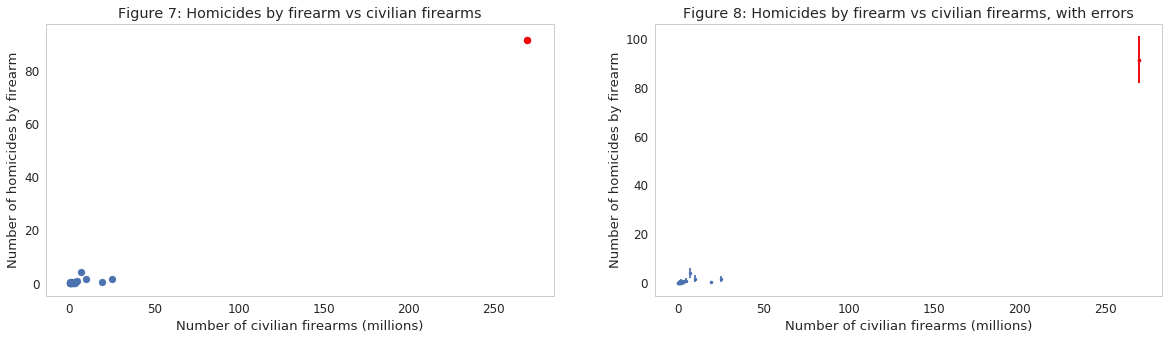

Number of homicides by firearm against civilian firearms with and without errors, errors represent Poisson statistics.
The datapoint to the top right of both Figure 7 and 8 is the USA,which has both the highest number of homicides by firearms
and the highest number of civilian firearms.
The errors shown in Figure 8 are proportionally small, confirming that the USA is an outlier.


In [21]:
fig = pl.figure(figsize=(20,5)) 
(ax1, ax2) = fig.subplots(1,2)

#First
ax1.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of homicides by firearm'] / 1e2)
ax1.scatter(df_.loc[df_.Country=='United States','Average total all civilian firearms'] / 1e6,
            df_.loc[df_.Country=='United States','Number of homicides by firearm'] / 1e2, color='r')
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 7: Homicides by firearm vs civilian firearms")
ax1.set_xlabel("Number of civilian firearms (millions)")
ax1.set_ylabel("Number of homicides by firearm")

#Second
ax2.errorbar(df_['Average total all civilian firearms'] / 1e6,
             df_['Number of homicides by firearm'] / 1e2,
            yerr = np.sqrt(df_['Number of homicides by firearm'] / 1e2), fmt = '.', capsize=3)
ax2.errorbar(df_.loc[df_.Country=='United States','Average total all civilian firearms'] / 1e6,
             df_.loc[df_.Country=='United States','Number of homicides by firearm'] / 1e2,
             yerr = np.sqrt(df_.loc[df_.Country=='United States','Number of homicides by firearm'] / 1e2),
             fmt = '.', capsize=3, color='r')
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 8: Homicides by firearm vs civilian firearms, with errors")
ax2.set_xlabel("Number of civilian firearms (millions)")
ax2.set_ylabel("Number of homicides by firearm")

pl.show()
print ("Number of homicides by firearm against civilian firearms with and without errors, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of both Figure 7 and 8 is the USA," + 
       "which has both the highest number of homicides by firearms\n"+
       "and the highest number of civilian firearms.\n"+
       "The errors shown in Figure 8 are proportionally small, confirming that the USA is an outlier.")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


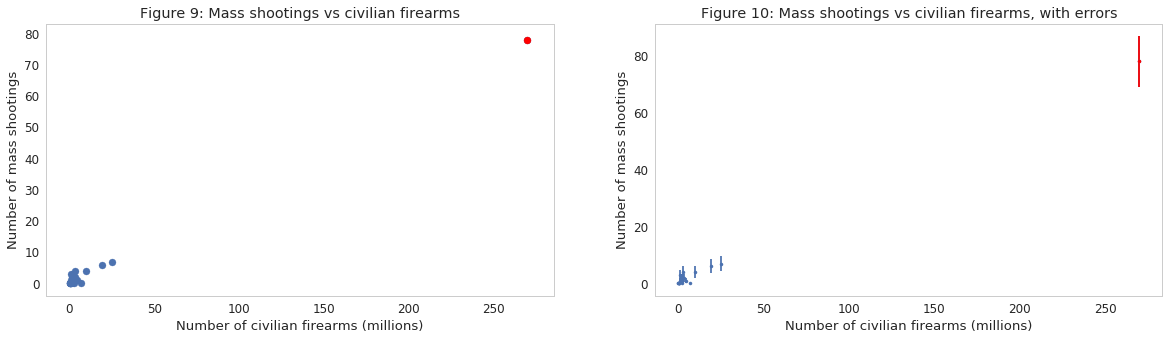

Number of mass shootings against civilian firearms with and without errors, errors represent Poisson statistics.
The datapoint to the top right of both Figure 9 and 10 is the USA,which has both the highest number of mass shootings
and the highest number of civilian firearms.
The errors shown in Figure 10 are again small, confirming that the USA is an outlier.


In [22]:
fig = pl.figure(figsize=(20,5)) 
(ax1, ax2) = fig.subplots(1,2)

#First
ax1.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of mass shootings'])
ax1.scatter(df_.loc[df_.Country=='United States','Average total all civilian firearms'] / 1e6,
            df_.loc[df_.Country=='United States','Number of mass shootings'] , color='r')
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 9: Mass shootings vs civilian firearms")
ax1.set_xlabel("Number of civilian firearms (millions)")
ax1.set_ylabel("Number of mass shootings")

#Second
ax2.errorbar(df_['Average total all civilian firearms'] / 1e6, df_['Number of mass shootings'],
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', capsize=3)
ax2.errorbar(df_.loc[df_.Country=='United States','Average total all civilian firearms'] / 1e6,
             df_.loc[df_.Country=='United States','Number of mass shootings'] ,
             yerr = np.sqrt(df_.loc[df_.Country=='United States','Number of mass shootings'] ),
             fmt = '.', capsize=3, color='r')
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 10: Mass shootings vs civilian firearms, with errors")
ax2.set_xlabel("Number of civilian firearms (millions)")
ax2.set_ylabel("Number of mass shootings")

pl.show()
print ("Number of mass shootings against civilian firearms with and without errors, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of both Figure 9 and 10 is the USA," + 
       "which has both the highest number of mass shootings\n"+
       "and the highest number of civilian firearms.\n"+
       "The errors shown in Figure 10 are again small, confirming that the USA is an outlier.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [23]:
#Creating each variable and normalizing by its average
df_['firearms_pp'] = (df_['Average total all civilian firearms'] / df_['pop']) / np.mean(df_['Average total all civilian firearms'] / df_['pop'])
df_['shootings_pp'] = ( df_['Number of mass shootings'] / df_['pop'] ) / np.mean(df_['Number of mass shootings'] / df_['pop'])

In [24]:
#Weights for WLS

#I added 0.01 to each variable to avoid having zeros that would end up as infinity for the weights.
#0.01 is sufficiently small proportionally to the data, and doing it for all the data points avoids
#introducing biased noise

errors = [np.sqrt(i+0.01) for i in df_['shootings_pp']]
weights = [1/e for e in errors]
print(weights)

[0.83526285738518058, 1.0153548230473601, 0.82635191652054751, 1.0305918067608306, 10.0, 0.57739416528775256, 1.1550797927471055, 1.1831561777052482, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 0.42572166215849422, 0.78505888867335094, 10.0, 1.1325379100603679, 2.3374981954230019, 0.76466349623259133, 0.70117932628427049, 0.70354187945671487]


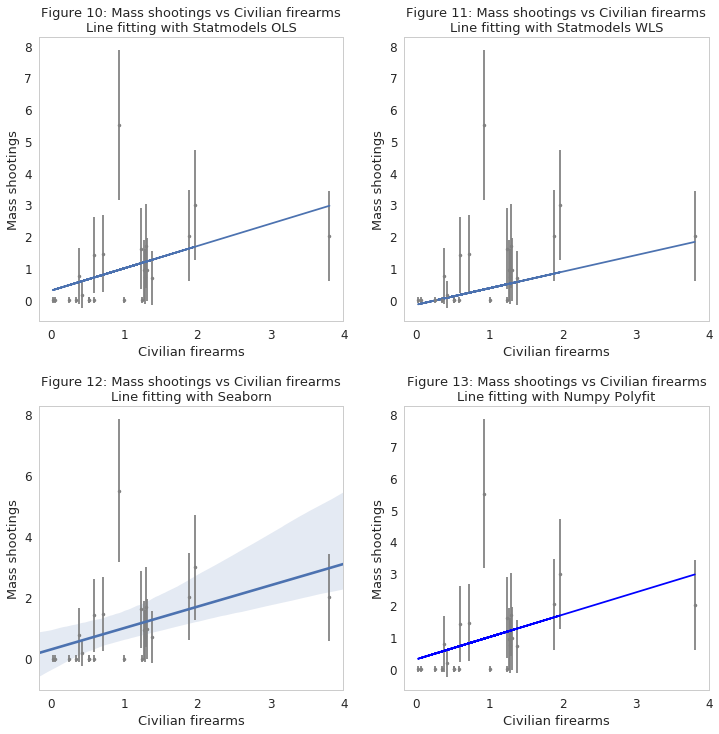

Line fitting using different packages. Figures 10, 12 and 13 show an
Ordinary Least Squares regression with different packages so the lines are the same.
Figure 11 is a Weighted Least Squares regression, weighting by error in the endogenous variable


In [33]:
fig = pl.figure(figsize=(12,12))
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)

#First: OLS
ax1.errorbar(df_['firearms_pp'], df_['shootings_pp'],
            yerr = errors, fmt = '.', capsize=2, color='grey')
smOLS = smf.ols(formula='shootings_pp ~ firearms_pp', data=df_).fit()
ax1.plot(df_['firearms_pp'], smOLS.predict())
ax1.set_ylim()
ax1.grid(False)

ax1.set_title("Figure 10: Mass shootings vs Civilian firearms\nLine fitting with Statmodels OLS", fontsize=13)
ax1.set_xlabel("Civilian firearms", fontsize=13)
ax1.set_ylabel("Mass shootings", fontsize=13)

#Second: WLS
ax2.errorbar(df_['firearms_pp'], df_['shootings_pp'],
            yerr = errors, fmt = '.', capsize=2, color='grey')
smWLS = smf.wls(formula='shootings_pp ~ firearms_pp', data=df_, weights=weights).fit()
ax2.plot(df_['firearms_pp'], smWLS.predict())
ax2.set_ylim()
ax2.grid(False)

ax2.set_title("Figure 11: Mass shootings vs Civilian firearms\nLine fitting with Statmodels WLS", fontsize=13)
ax2.set_xlabel("Civilian firearms", fontsize=13)
ax2.set_ylabel("Mass shootings", fontsize=13)

#Third: Seaborn
ax3.errorbar(df_['firearms_pp'], df_['shootings_pp'],
            yerr = errors, fmt = '.', capsize=2, color='grey')
sns.regplot(x=df_['firearms_pp'], y=df_['shootings_pp'], ax=ax3, scatter=False)
ax3.set_ylim()
ax3.grid(False)

ax3.set_title("Figure 12: Mass shootings vs Civilian firearms\nLine fitting with Seaborn", fontsize=13)
ax3.set_xlabel("Civilian firearms", fontsize=13)
ax3.set_ylabel("Mass shootings", fontsize=13)

#Fourth: Numpy
ax4.errorbar(df_['firearms_pp'], df_['shootings_pp'],
            yerr = errors, fmt = '.', capsize=2, color='grey')
coeffs = np.polyfit(df_['firearms_pp'],df_['shootings_pp'], deg=1)
ax4.plot(df_['firearms_pp'], coeffs[0]*df_['firearms_pp'] + coeffs[1], color='b')
ax4.set_ylim()
ax4.grid(False)

ax4.set_title("Figure 13: Mass shootings vs Civilian firearms\nLine fitting with Numpy Polyfit", fontsize=13)
ax4.set_xlabel("Civilian firearms", fontsize=13)
ax4.set_ylabel("Mass shootings", fontsize=13)

pl.subplots_adjust(hspace=0.3)

pl.show()
print ("Line fitting using different packages. Figures 10, 12 and 13 show an\n" + 
       "Ordinary Least Squares regression with different packages so the lines are the same.\n" +
       "Figure 11 is a Weighted Least Squares regression, weighting by error in the endogenous variable")

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
#from IPython.display import Image
#Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
#from IPython.display import Image
#Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
#from IPython.display import Image
#Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
#from IPython.display import Image
#Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
#pl.figure()
#import seaborn  as sns
#sns.regplot(x="x", y="y", data=df_);

#pl.ylabel("Mass shootings")
#pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [34]:
df_labeled = df_.set_index('Country')

In [35]:
smOLS = smf.ols(formula='shootings_pp ~ firearms_pp', data=df_labeled).fit()

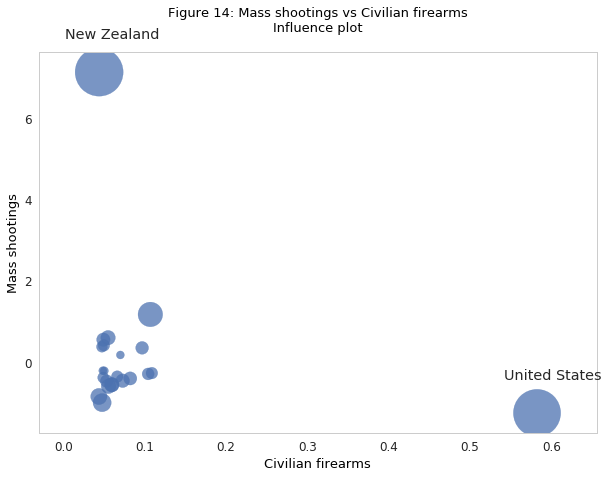

Mass shootings vs Civilian firearms, influece plot.
Figure 14 shows the same scatter plot as before but the size of each
data point is how much it influences the regression result. We can see that
the USA and New Zealand are the most influential data points, so they could be
candidates for taking them out of the regression as outliers.


In [36]:
fig = pl.figure(figsize=(10,7)) 
ax = fig.subplots(1,1)

sm.graphics.influence_plot(smOLS, alpha  = 0.05, criterion="cooks", ax=ax).get_axes()

ax.set_ylim()
ax.grid(False)

ax.set_title("Figure 14: Mass shootings vs Civilian firearms\nInfluence plot\n", fontsize=13)
ax.set_xlabel("Civilian firearms", fontsize=13)
ax.set_ylabel("Mass shootings", fontsize=13)

pl.show()
print ("Mass shootings vs Civilian firearms, influece plot.\n" + 
       "Figure 14 shows the same scatter plot as before but the size of each\n" +
       "data point is how much it influences the regression result. We can see that\n"+
       "the USA and New Zealand are the most influential data points, so they could be\n"+
       "candidates for taking them out of the regression as outliers.")

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings